In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import imutils

### Functions for Enumerating Corresponding Organoids Between Design and Reward Matrices

In [2]:
df = pd.read_csv("BMS-tile-ROI-centroids.csv")
df.head()

,,XM,YM,BX,BY,Width,Height
0,1,2993.604,353.666,2958.151,260.00,71.50,207.35
1,2,2616.486,362.567,2578.551,274.95,75.40,185.90
2,3,2191.657,374.522,2149.551,275.60,115.05,200.20
3,4,1801.586,398.023,1763.451,276.25,85.15,215.15
4,5,1388.121,410.170,1334.450,277.55,93.60,232.70


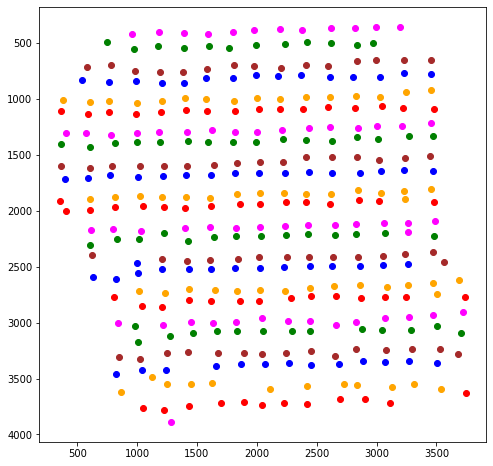

In [3]:
# get coordinates and sort according to y 
coords = list(zip(df.XM, df.YM))
coordsYsort = sorted(coords, key = lambda x: x[1])

# make dictionary for grouping organoids
patternDict = {}
colors_used = [0,0,0,0,0,0]

# Colors used for plot and grouping organoids
colors = ['magenta','green', 'brown', 'blue','orange', 'red']
# TO BE MODIFIED: Number of organoids in each y-axis layer
orgNumYaxisAscending = [12,12,15,15,16,16,16,16,16,16,16,16,15,14,14,15,15,14,14,14,15,13,12,12,1]


plt.figure(figsize=(8,8))

num_col = len(colors)
start = 0
# loop through y axis layers, plot groups and save in dictionary
for ix, num in enumerate(orgNumYaxisAscending):
    col_ix = ix % num_col
    vals = np.array(coordsYsort[start:start+num])
    valsXsort = sorted(vals, key = lambda x: x[0])
    currColor = colors[col_ix]
    
    # if color not in dictionary, add color
    # else denote its index e.g. blue3
    if currColor not in patternDict:
        patternDict[currColor] = valsXsort
    else:
        key_num = colors_used[col_ix]
        newKey_num = key_num + 1
        key_name = currColor + str(newKey_num)
        patternDict[key_name] = valsXsort
        colors_used[col_ix] = newKey_num
               
    plt.scatter(np.array(vals)[:,0], np.array(vals)[:,1], c = currColor)
    start = start+num

# flip y axis for plotting purposes
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()

In [345]:
# swap coordinates between groups
def swap(str1, int1, str2, int2):
    patternDict[str1][int1], patternDict[str2][int2] = patternDict[str2][int2], patternDict[str1][int1]
# move coordinate to a group
def move(str1, int1, str2):
    popEl = patternDict[str1].pop(int1)
    patternDict[str2].append(popEl)
    patternDict[str2] = sorted(patternDict[str2], key = lambda x: x[0])
    

**Validating swap and move**

In [338]:
patternDict

{'magenta': [array([955.299, 419.514]),
  array([1184.186,  403.634]),
  array([1388.121,  410.17 ]),
  array([1592.825,  415.573]),
  array([1801.586,  398.023]),
  array([1980.443,  386.856]),
  array([2191.657,  374.522]),
  array([2380.135,  385.627]),
  array([2616.486,  362.567]),
  array([2819.273,  368.319]),
  array([2993.604,  353.666]),
  array([3195.024,  354.42 ])],
 'green': [array([747.258, 493.072]),
  array([975.646, 556.036]),
  array([1177.495,  526.832]),
  array([1395.199,  547.599]),
  array([1597.535,  529.085]),
  array([1769.252,  542.288]),
  array([1994.248,  518.79 ]),
  array([2239.316,  509.445]),
  array([2419.945,  486.827]),
  array([2620.632,  501.033]),
  array([2840.526,  520.939]),
  array([2966.913,  497.323])],
 'brown': [array([582.319, 711.038]),
  array([784.025, 694.891]),
  array([981.703, 751.68 ]),
  array([1190.902,  759.302]),
  array([1387.349,  760.945]),
  array([1587.639,  733.25 ]),
  array([1812.832,  698.113]),
  array([1974.787,  

In [339]:
len(patternDict['magenta'])

12

In [340]:
swap('magenta', 0, 'green', 0)

In [341]:
patternDict

{'magenta': [array([747.258, 493.072]),
  array([1184.186,  403.634]),
  array([1388.121,  410.17 ]),
  array([1592.825,  415.573]),
  array([1801.586,  398.023]),
  array([1980.443,  386.856]),
  array([2191.657,  374.522]),
  array([2380.135,  385.627]),
  array([2616.486,  362.567]),
  array([2819.273,  368.319]),
  array([2993.604,  353.666]),
  array([3195.024,  354.42 ])],
 'green': [array([955.299, 419.514]),
  array([975.646, 556.036]),
  array([1177.495,  526.832]),
  array([1395.199,  547.599]),
  array([1597.535,  529.085]),
  array([1769.252,  542.288]),
  array([1994.248,  518.79 ]),
  array([2239.316,  509.445]),
  array([2419.945,  486.827]),
  array([2620.632,  501.033]),
  array([2840.526,  520.939]),
  array([2966.913,  497.323])],
 'brown': [array([582.319, 711.038]),
  array([784.025, 694.891]),
  array([981.703, 751.68 ]),
  array([1190.902,  759.302]),
  array([1387.349,  760.945]),
  array([1587.639,  733.25 ]),
  array([1812.832,  698.113]),
  array([1974.787,  

In [342]:
len(patternDict['magenta'])

12

In [346]:
move('green', 0, 'magenta')

In [347]:
patternDict

{'magenta': [array([747.258, 493.072]),
  array([955.299, 419.514]),
  array([1184.186,  403.634]),
  array([1388.121,  410.17 ]),
  array([1592.825,  415.573]),
  array([1801.586,  398.023]),
  array([1980.443,  386.856]),
  array([2191.657,  374.522]),
  array([2380.135,  385.627]),
  array([2616.486,  362.567]),
  array([2819.273,  368.319]),
  array([2993.604,  353.666]),
  array([3195.024,  354.42 ])],
 'green': [array([975.646, 556.036]),
  array([1177.495,  526.832]),
  array([1395.199,  547.599]),
  array([1597.535,  529.085]),
  array([1769.252,  542.288]),
  array([1994.248,  518.79 ]),
  array([2239.316,  509.445]),
  array([2419.945,  486.827]),
  array([2620.632,  501.033]),
  array([2840.526,  520.939]),
  array([2966.913,  497.323])],
 'brown': [array([582.319, 711.038]),
  array([784.025, 694.891]),
  array([981.703, 751.68 ]),
  array([1190.902,  759.302]),
  array([1387.349,  760.945]),
  array([1587.639,  733.25 ]),
  array([1812.832,  698.113]),
  array([1974.787,  

In [348]:
len(patternDict['magenta'])

13

In [349]:
len(patternDict['green'])

11

### TO DO: Generalize above function to work on CAD and Initial State MicroPattern

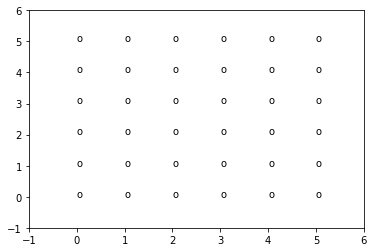

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax=fig.add_subplot(111)
plt.plot([0,5],[0,6], alpha=0)
plt.xlim([-1,6])
plt.ylim([-1,6])

for i in range(6):
    for j in range(6):
        an = plt.annotate("o",xy=(j,i), picker=5)

dataLog = []

def onclick(event):
    event.artist.set_text("o")
    val = input("Enter value from [g,r,b]: ")
    event.artist.set_color(val)
    event.artist.set_rotation(20)
    # really kill the text 
    #event.artist.set_visible(False) 
    # or really REALLY kill it with:
    #event.artist.remove()
    fig.canvas.draw()
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    dataLog.append(data)


cid = fig.canvas.mpl_connect('pick_event', onclick)

plt.show()

In [ ]:
im_cad = cv2.imread("cadConfiguration.png",0)
im_pat = cv2.imread("cvMask.png",0)

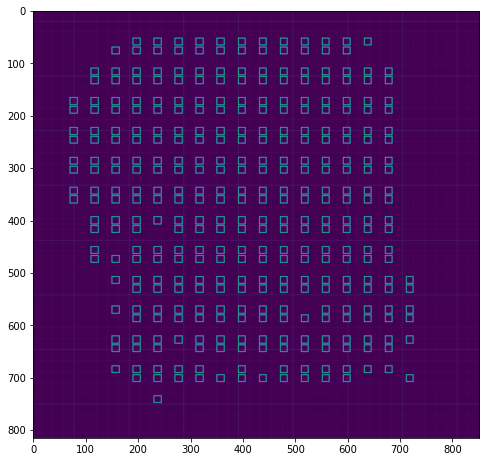

In [179]:
plt.figure(figsize=(8,8))
plt.imshow(im_cad)
plt.show()

221 177
204 174
177
174


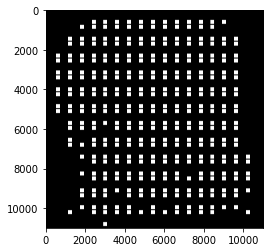

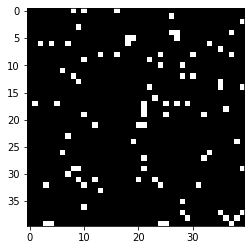

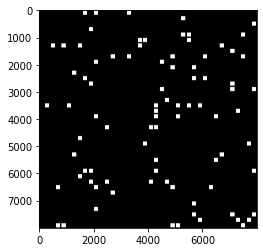

In [4]:
# PAIRED ARRAY

b1 = np.ones((13,17))
b2 = np.ones((12,17))
res1_lo = np.argwhere(b1 == 1)
res2_lo = np.argwhere(b2 == 1)
res1_empty = np.array(
    [0,1,2,15,16,17,
     17*2-1,17*3-1,17*4-1,17*5-1,17*6-1,
     17*6,17*7-1,17*7,17*7+2,17*8-1,
     17*8,17*8+1,17*9,17*9+1,17*9+11,
     17*10,17*10+1,17*11,17*11+1,17*11+7,17*11+9,
     17*12-1,17*12,17*12+1,17*12+2,17*12+3,17*12+5,
     17*12+6,17*12+7,17*12+8,17*12+9,17*12+10,17*12+11,
     17*12+12,17*12+13,17*12+14,17*12+15,17*12+16])
res2_empty = np.array(
    [0,1,14,15,16,17,
     17*2-1,17*3-1,17*4-1,17*5-1,17*6-1,
     17*6,17*6+4,17*7-1,17*7,17*8-1,
     17*8,17*8+1,17*8+2,17*9,17*9+1,17*9+2,
     17*10,17*10+1,17*10+5,17*11-1,17*11,
     17*11+2,17*11+14,17*11+15])

print(res1_lo.shape[0], res1_lo.shape[0]-res1_empty.size)
print(res2_lo.shape[0], res2_lo.shape[0]-res2_empty.size)

res1_lo = np.delete(res1_lo, res1_empty, axis=0)
res2_lo = np.delete(res2_lo, res2_empty, axis=0)

print(res1_lo.shape[0])
print(res2_lo.shape[0])

res1 = np.array([np.array([yi*850, xi*600])+500 for yi, xi in res1_lo])
res2 = np.array([np.array([yi*850, xi*600])+500 for yi, xi in res2_lo])

im = np.zeros((11000, 11000))
for k in range(res1.shape[0]):
    y, x = res1[k][0], res1[k][1]
    im[y:y+200,x:x+200] = 1
for k in range(res2.shape[0]):
    y, x = res2[k][0], res2[k][1]
    im[y+250:y+450,x:x+200] = 1
plt.figure()
plt.imshow(im, plt.cm.gray)
plt.show()

# RANDOM ARRAY
# each pixel is 200 x 200 micron (150 x 150 micron square with 25 µm padding)
# overall patterning area is 8000 x 8000 micron (40 x 40 pixels)
# 1/16 of pixels (100/1600 pixels) are filled on average

np.random.seed(3) # set random seed for reproducibility
f = 1/16
a = np.random.rand(40,40) 
b = np.where(a < f, 1, 0) # binary image
plt.figure()
plt.imshow(b, plt.cm.gray)

# generate full array, where each pixel is now 1 x 1 micron
res_lo = np.argwhere(b == 1)
res = res_lo*200+25
im = np.zeros((8000, 8000))
for k in range(res.shape[0]):
    y, x = res[k][0], res[k][1]
    im[y:y+150,x:x+150] = 1
plt.figure()
plt.imshow(im, plt.cm.gray)
plt.show()

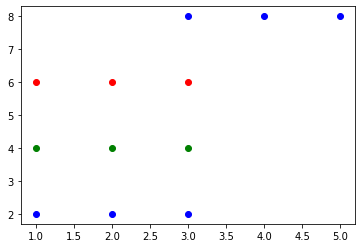

In [13]:
x = [1,2,3,1,2,3,1,2,3,3,4,5]
y = [2,2,2,4,4,4,6,6,6,8,8,8]
c_ = ['b', 'b', 'b', 'g','g', 'g','r', 'r','r','b', 'b', 'b']

for i, (x,y) in enumerate(zip(x,y)):
        an = plt.scatter(x,y,c=c_[i],picker=5)
